# ***Amazon Sales report  data analysis***

In [ ]:
# prompt: import pandas ,numpy, matplot lib, seaborn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
dataset=pd.read_csv('/content/drive/MyDrive/Amazon Sale Report.csv')

<ipython-input-4-0ca98774bfee>:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset=pd.read_csv('/content/drive/MyDrive/Amazon Sale Report.csv')


In [ ]:
dataset.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 24 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      122103 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            121180 non-null  object 
 15  Amount              121180 non-nul

In [ ]:
#check the data id null or not
count=dataset.isnull().sum()
print(count)
missvalue=dataset.columns[dataset.isnull().sum()>0]
print(missvalue)
print((dataset.isnull().sum()/len(dataset))*100)


index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
ship-country             33
promotion-ids         49153
B2B                       0
fulfilled-by          89698
Unnamed: 22           49050
dtype: int64
Index(['Courier Status', 'currency', 'Amount', 'ship-city', 'ship-state',
       'ship-postal-code', 'ship-country', 'promotion-ids', 'fulfilled-by',
       'Unnamed: 22'],
      dtype='object')
index                  0.000000
Order ID               0.000000
Date                   0.000000
Status                 0

,0
ant AAT-P3CSUAK4HTEP2,11
Amazon PLCC Free-Financing Universal Merchant AAT-ACZIPIA37BFIY,6818
Amazon PLCC Free-Financing Universal Merchant AAT-YFJA6XMAMWZSK,3
Amazon PLCC Free-Financing Universal Merchant AAT-K66BSCE2J2V5E,7
Amazon PLCC Free-Financing Universal Merchant AAT-275LMAQ3T5REI,1
Amazon PLCC Free-Financing Universal Merchant AAT-4UKS7UWZY3AES,1337
Amazon PLCC Free-Financing Universal Merchant AAT-BRSZZ45H6MHAO,7411
Amazon PLCC Free-Financing Universal Merchant AAT-MKLXOOZWQL7GO,64
Amazon PLCC Free-Financing Universal Merchant AAT-CB7UNXEXGIJTC,8391
Amazon PLCC Free-Financing Universal Merchant #MP-gzasho-1593152694811,1


# **`clean the data`**

In [ ]:
# Fill missing values with the column's mode
dataset['Courier Status'].fillna(dataset['Courier Status'].mode()[0], inplace=True)
dataset['Qty'].fillna(dataset['Qty'].mean(), inplace=True)
dataset["currency"].fillna(dataset["currency"].mode()[0],inplace=True)
dataset["Amount"].fillna(dataset["Amount"].mean(),inplace=True)
dataset["ship-city"].fillna(dataset["ship-city"].mode()[0],inplace=True)
dataset["ship-state"].fillna(dataset["ship-state"].mode()[0],inplace=True)
dataset["ship-postal-code"].fillna(dataset["ship-postal-code"].mode()[0],inplace=True)
dataset["ship-country"].fillna(dataset["ship-country"].mode()[0],inplace=True)
dataset["promotion-ids"].fillna(dataset["promotion-ids"].mode()[0],inplace=True)
dataset["B2B"].fillna(dataset["B2B"].mode()[0],inplace=True)
dataset['fulfilled-by'].fillna(dataset['fulfilled-by'].mode()[0], inplace=True)


<ipython-input-7-2bbd77f281b3>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Courier Status'].fillna(dataset['Courier Status'].mode()[0], inplace=True)
<ipython-input-7-2bbd77f281b3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

In [ ]:
#drop the dataset["Unnamed: 22 "].remove column
dataset = dataset.drop('Unnamed: 22', axis=1)


In [ ]:
dataset

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,...,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,...,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,...,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,Easy Ship
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,...,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,...,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,1,INR,1199.00,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Easy Ship


In [ ]:
count=dataset.isnull().sum()
print(count)
missvalue=dataset.columns[dataset.isnull().sum()>0]
print(missvalue)

index                 0
Order ID              0
Date                  0
Status                0
Fulfilment            0
Sales Channel         0
ship-service-level    0
Style                 0
SKU                   0
Category              0
Size                  0
ASIN                  0
Courier Status        0
Qty                   0
currency              0
Amount                0
ship-city             0
ship-state            0
ship-postal-code      0
ship-country          0
promotion-ids         0
B2B                   0
fulfilled-by          0
dtype: int64
Index([], dtype='object')


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128975 entries, 0 to 128974
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128975 non-null  int64  
 1   Order ID            128975 non-null  object 
 2   Date                128975 non-null  object 
 3   Status              128975 non-null  object 
 4   Fulfilment          128975 non-null  object 
 5   Sales Channel       128975 non-null  object 
 6   ship-service-level  128975 non-null  object 
 7   Style               128975 non-null  object 
 8   SKU                 128975 non-null  object 
 9   Category            128975 non-null  object 
 10  Size                128975 non-null  object 
 11  ASIN                128975 non-null  object 
 12  Courier Status      128975 non-null  object 
 13  Qty                 128975 non-null  int64  
 14  currency            128975 non-null  object 
 15  Amount              128975 non-nul

In [ ]:
dataset["Amount"].sum()

78592678.29999998

In [ ]:
dataset["Size"].nunique()

11

,count
Order ID,
171-5057375-2831560,12
403-4984515-8861958,12
403-0173977-3041148,11
404-9932919-6662730,11
408-3317403-1729937,10
...,...
405-0271223-6692335,1
406-7498475-4257161,1
402-2493916-3621929,1


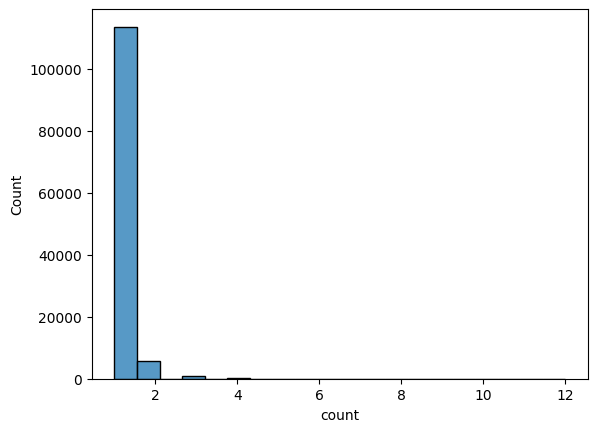

In [ ]:
purchase_frequency = dataset['Order ID'].value_counts()
sns.histplot(purchase_frequency, bins=20)
purchase_frequency


In [ ]:
date=pd.to_datetime(dataset["Date"])
values=dataset["Date"].nunique()
print(values)


91


<ipython-input-8-1577bfc3e7de>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date=pd.to_datetime(dataset["Date"])


In [ ]:
size=dataset["Size"].value_counts()
print(size)
date=dataset["Date"].value_counts()
print(max(date),min(date))

Size
M       22711
L       22132
XL      20876
XXL     18096
S       17090
3XL     14816
XS      11161
6XL       738
5XL       550
4XL       427
Free      378
Name: count, dtype: int64
2085 171


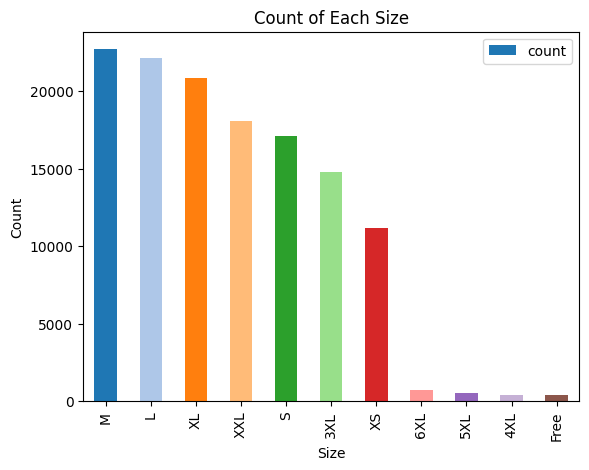

In [ ]:
size.plot(kind="bar", color=plt.cm.tab20.colors[:len(size)], legend=True)
plt.xlabel('Size')
plt.ylabel('Count')
plt.title('Count of Each Size')
plt.show()

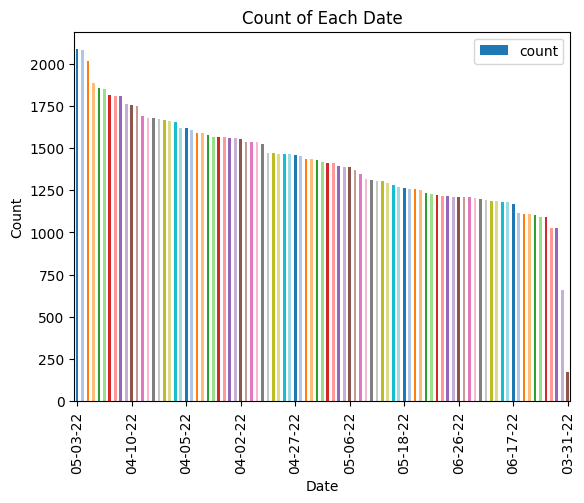

In [ ]:
date.plot(kind="bar", color=plt.cm.tab20.colors[:len(date)], legend=True)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Count of Each Date')
plt.show()

In [ ]:
maxsi=dataset.groupby("Size")["Date"].idxmax()
print (maxsi)

Size
3XL     91212
4XL     91425
5XL     91417
6XL     91260
Free    92112
L       91194
M       91188
S       91189
XL      91198
XS      91187
XXL     91186
Name: Date, dtype: int64


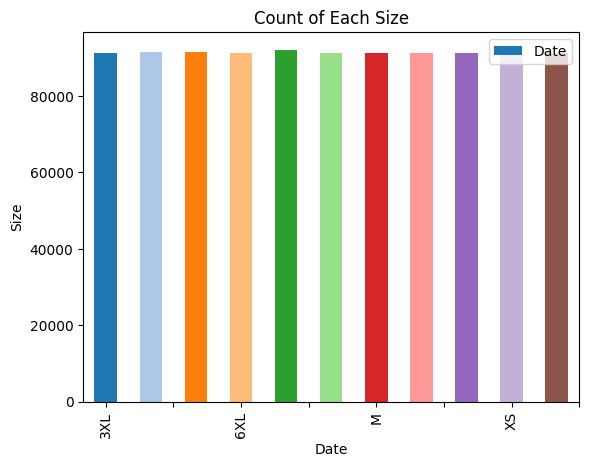

In [ ]:
maxsi.plot(kind="bar", color=plt.cm.tab20.colors[:len(maxsi)], legend=True)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))  # Show only 10 date labels
plt.xlabel('Date')
plt.ylabel('Size')
plt.title('Count of Each Size')
plt.show()

SyntaxError: invalid syntax (<ipython-input-1-626222c6b718>, line 1)